In [1]:
import zipfile

with zipfile.ZipFile('ml-1m.zip', 'r') as zip_ref:
    zip_ref.extractall('ml-1m')


In [5]:
import pandas as pd

ratings = pd.read_csv('ratings.dat', delimiter='::',engine = 'python', names = ['userID', 'MovieID', 'Rating', 'Timestamp'], encoding='ISO-8859-1')

movies = pd.read_csv('movies.dat', delimiter = '::', engine = 'python', names =['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')

users = pd.read_csv('users.dat', delimiter = '::', engine = 'python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='ISO-8859-1')


# Data Cleaning

In [6]:
#checking for missing Values

print(ratings.isnull().sum())

userID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


In [7]:
print(movies.isnull().sum())

MovieID    0
Title      0
Genres     0
dtype: int64


In [8]:
print(users.isnull().sum())

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


In [10]:
#Handling Duplicates

ratings.drop_duplicates(inplace=True)

In [11]:
movies.drop_duplicates(inplace=True)

users.drop_duplicates(inplace=True)

In [12]:
ratings['TimeStamp'] = pd.to_datetime(ratings['Timestamp'], unit = 's')

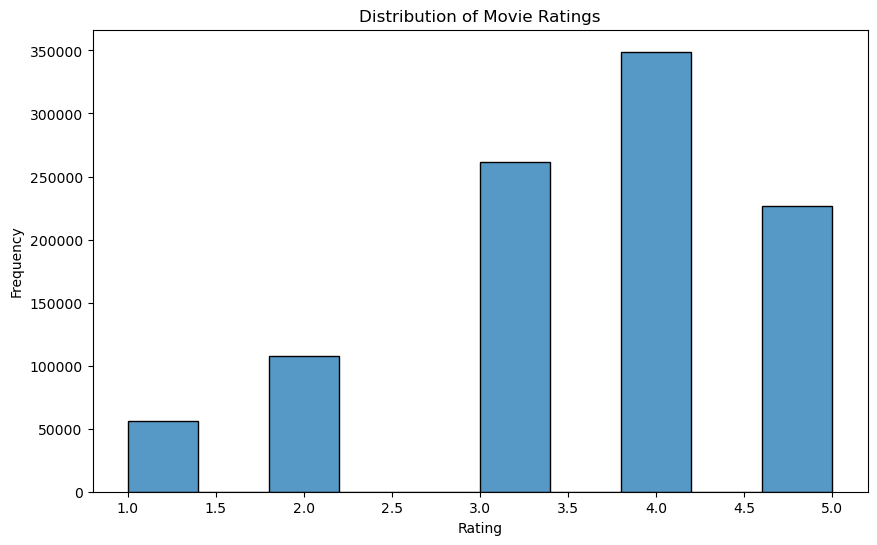

In [15]:
#Distribution of Ratings

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
sns.histplot(ratings['Rating'], bins=10, kde = False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

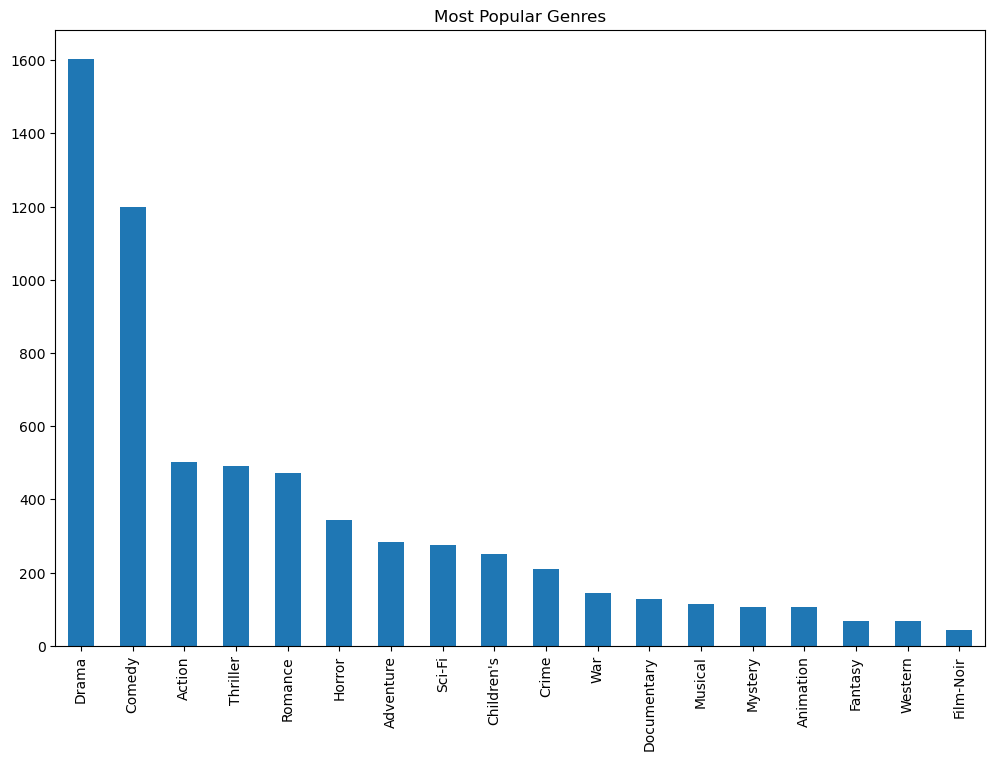

In [16]:
#most popular genres

genre_counts = movies['Genres'].str.split('|').explode().value_counts()
genre_counts.plot(kind='bar', figsize=(12,8), title='Most Popular Genres')
plt.show()


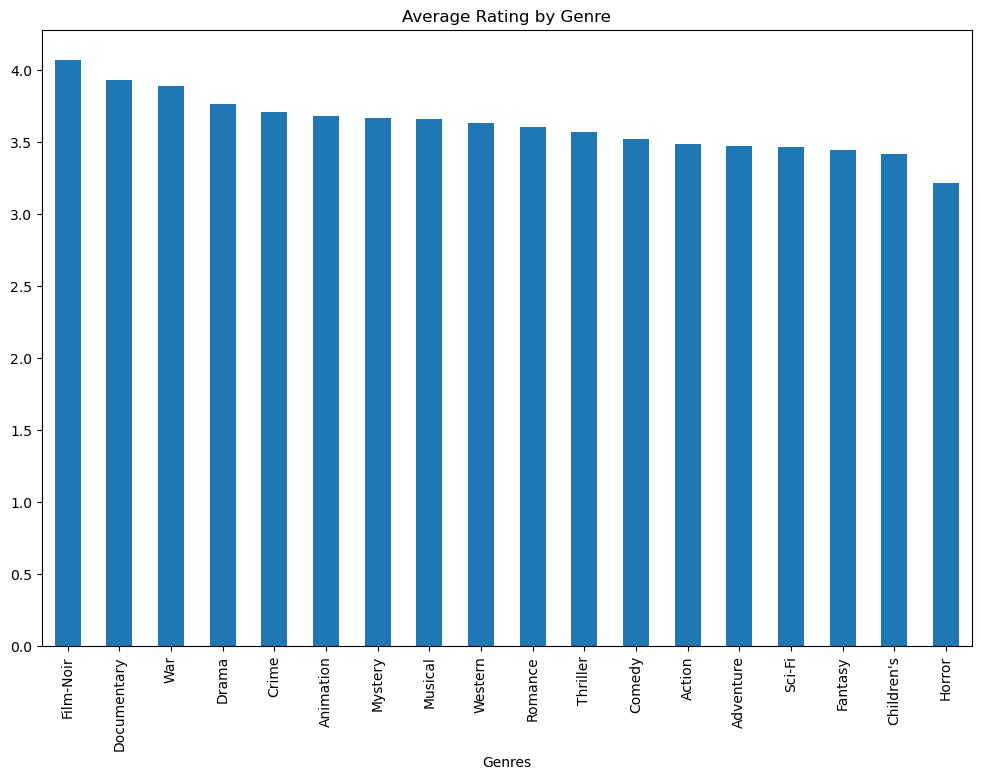

In [20]:
#Average Rating Genre

movie_ratings = pd.merge(ratings,movies, on='MovieID')
movie_ratings['Genres'] = movie_ratings['Genres'].str.split('|')
genre_ratings = movie_ratings.explode('Genres').groupby('Genres')['Rating'].mean().sort_values(ascending = False)
genre_ratings.plot(kind = 'bar', figsize = (12,8), title='Average Rating by Genre')
plt.show()

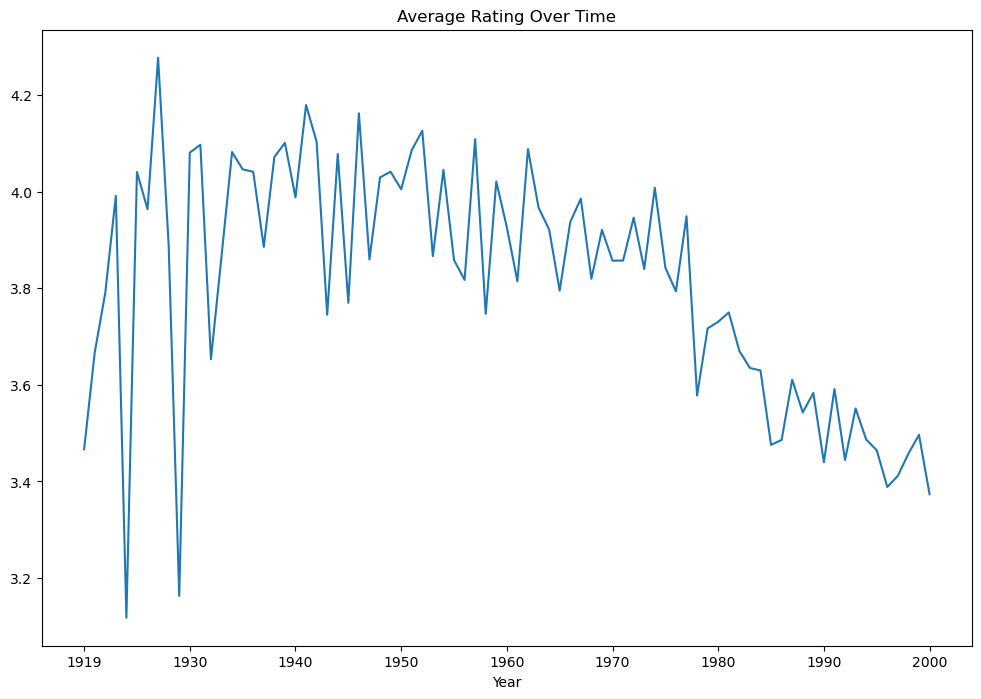

In [23]:
#average rating over years


movie_ratings['Year'] = movie_ratings['Title'].str.extract(r'\((\d{4})\)')
avg_ratings_by_year = movie_ratings.groupby('Year')['Rating'].mean()
avg_ratings_by_year.plot(kind='line', figsize=(12, 8), title='Average Rating Over Time')
plt.show()


In [26]:
# Merge ratings and movies data
movie_ratings = pd.merge(ratings, movies, on='MovieID')

# Split genres and explode the list into multiple rows
movie_ratings['Genres'] = movie_ratings['Genres'].str.split('|')
movie_ratings = movie_ratings.explode('Genres')

# Calculate the mean rating for each genre-title combination and find the top movie per genre
top_movies_by_genre = movie_ratings.groupby(['Genres', 'Title'])['Rating'].mean()
top_movies_by_genre = top_movies_by_genre.groupby('Genres').nlargest(1).reset_index(level=0, drop=True)

# Display the result
print(top_movies_by_genre)


Genres       Title                                        
Action       Sanjuro (1962)                                   4.608696
Adventure    Ulysses (Ulisse) (1954)                          5.000000
Animation    Close Shave, A (1995)                            4.520548
Children's   Wizard of Oz, The (1939)                         4.247963
Comedy       Follow the Bitch (1998)                          5.000000
Crime        Lured (1947)                                     5.000000
Documentary  Bittersweet Motel (2000)                         5.000000
Drama        One Little Indian (1973)                         5.000000
Fantasy      Star Wars: Episode IV - A New Hope (1977)        4.453694
Film-Noir    Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    4.491489
Horror       Baby, The (1973)                                 5.000000
Musical      Singin' in the Rain (1952)                       4.283622
Mystery      Hour of the Pig, The (1993)                      4.500000
Romance      Skipp

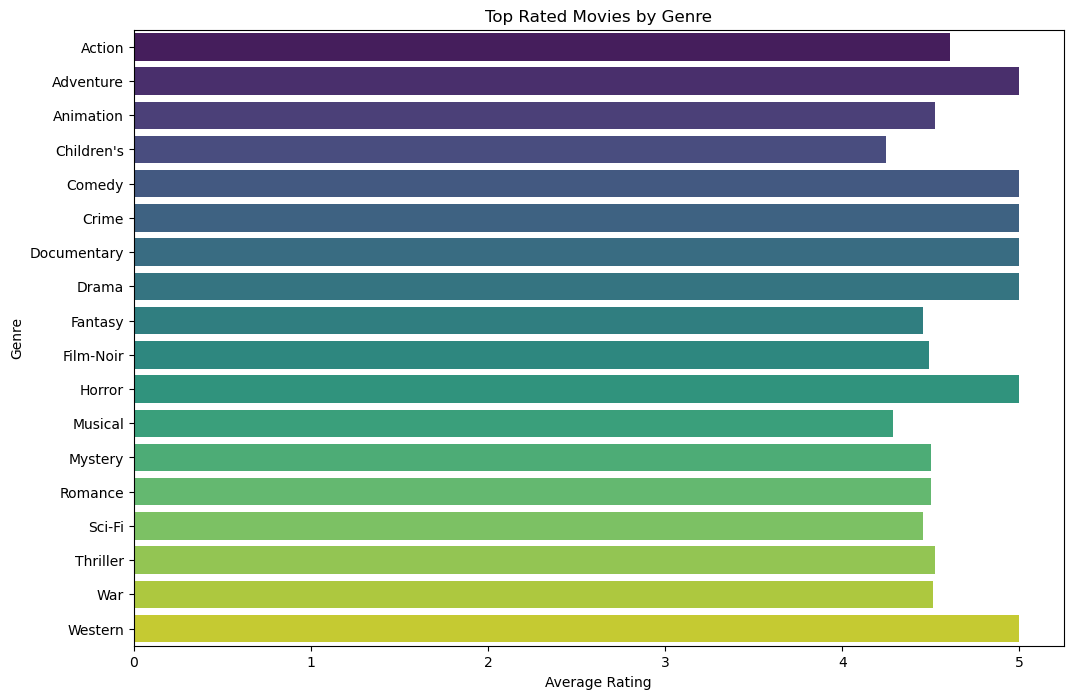

In [27]:
#data Visulisation
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to get a DataFrame suitable for plotting
top_movies_by_genre_df = top_movies_by_genre.reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Genres', data=top_movies_by_genre_df, palette='viridis')

# Add titles and labels
plt.title('Top Rated Movies by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')

# Show the plot
plt.show()


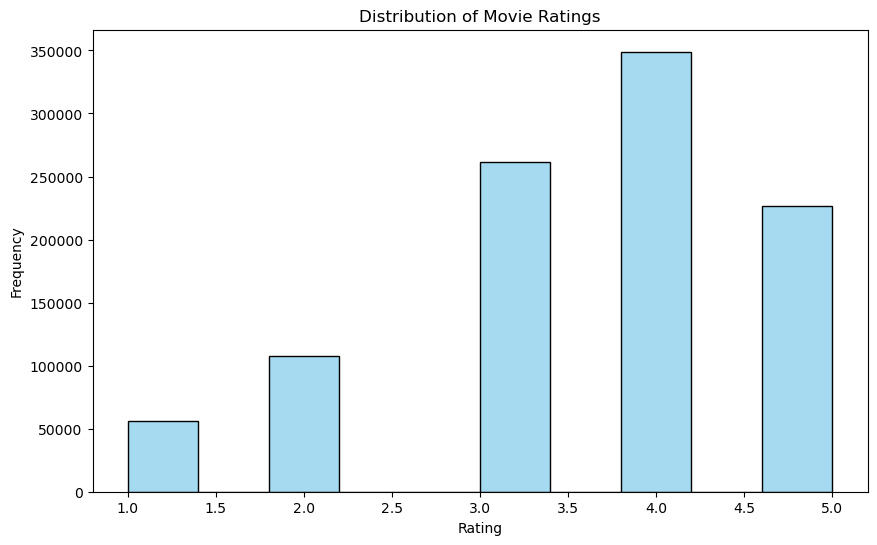

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(ratings['Rating'], bins=10, kde=False, color='skyblue')

# Add titles and labels
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [29]:
# Group by 'Genres' and calculate the mean rating for each genre
average_rating_by_genre = movie_ratings.groupby('Genres')['Rating'].mean().sort_values(ascending=False)


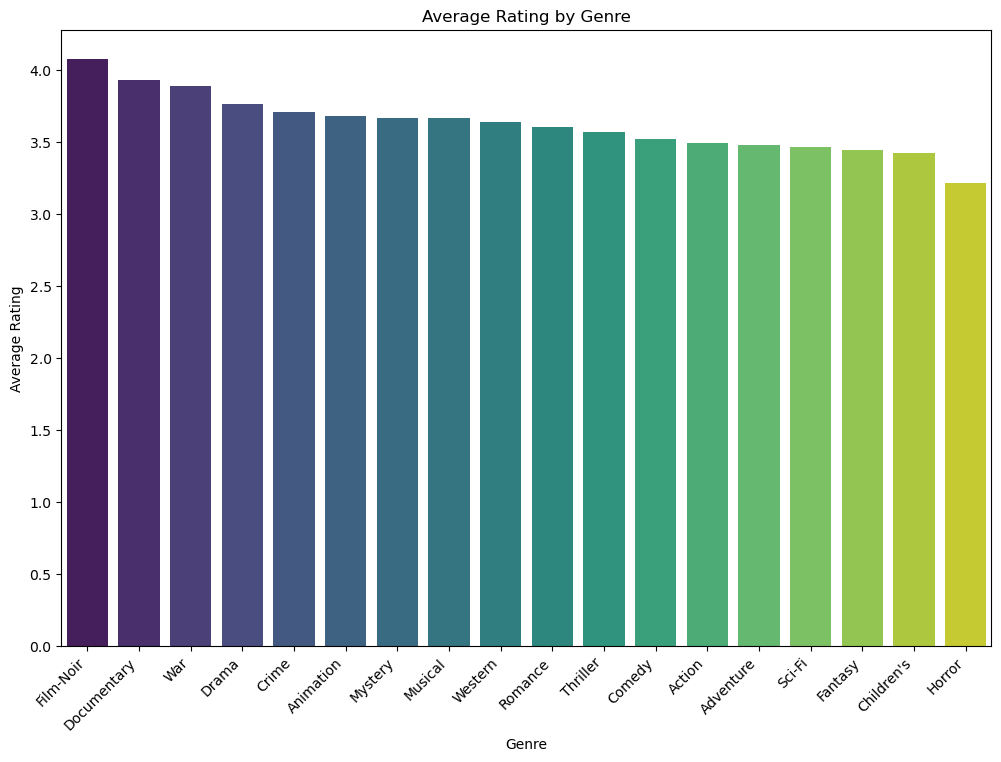

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for easier plotting
average_rating_by_genre_df = average_rating_by_genre.reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Genres', y='Rating', data=average_rating_by_genre_df, palette='viridis')

# Add titles and labels
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate genre names for better readability

# Show the plot
plt.show()
